# X-ray Diffraction

In [6]:
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator

structure = 0
#On télécharge le fichier .cif
with MPRester('G076mkTglycC4EiF') as m:
    id = 'mp-866141'
    structure = m.get_structure_by_material_id(id)
print(structure)

Full Formula (Ti1 Fe2 Si1)
Reduced Formula: TiFe2Si
abc   :   4.024911   4.024911   4.024911
angles:  60.000000  60.000000  60.000000
Sites (4)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Ti    0     0     0           -0
  1  Fe    0.25  0.25  0.25         0
  2  Fe    0.75  0.75  0.75         0
  3  Si    0.5   0.5   0.5         -0


In [28]:
#on crée un objet XRDCalculator() et on en extrait le modele avec la fonction get_pattern() de l'API
lam = 1.5406
o = XRDCalculator(lam)
mod = o.get_pattern(structure)
#print(mod) pour voir le return de la fct get_pattern()

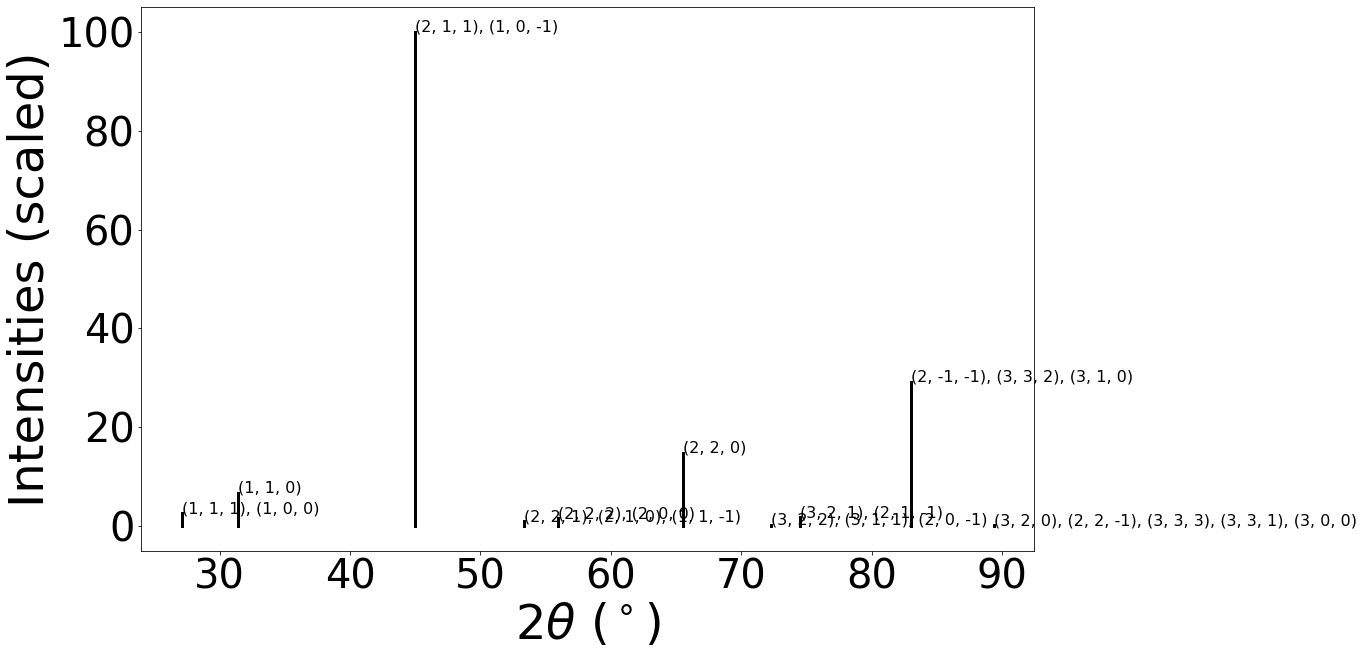

In [31]:
#pour visualiser le diffractogramme on utilise la fonction show_plot de l'API
o.show_plot(structure)

Sur le graphe ci-dessus, on observe qu'à chaque intensité est lié un angle 2$\theta$. Cet angle est l'angle de diffraction, c'est à dire, l'angle entre la direction première et la déviation du faisceau par le cristal.

In [52]:
#En utilisant l'API, on remarque que mod a 4 arguments qui sont : x = angle 2$\theta$, y = intensité, hkls = indices des plans et leur multiplicité, d_hkls = liste des distances interplan

def print_pic(i):
    print("Angle 2θ           : " + str(mod.x[i]))
    print("Intensité          : " + str(mod.y[i]))
    print("Indices associés   : " + str(mod.hkls[i]))
    print("Distance interplan : " + str(mod.d_hkls[i]))
    print("\n===============================================================================================================================")


#POUR LE PREMIER PIC
print("LE PREMIER PIC\n")
print_pic(0)

#POUR LE SECOND PIC
print("LE SECOND PIC\n")
print_pic(1)

#POUR LE TROISIEME PIC
print("LE TROISIEME PIC\n")
print_pic(2)

LE PREMIER PIC

Angle 2θ           : 27.11198165322919
Intensité          : 2.6205457410953743
Indices associés   : [{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]
Distance interplan : 3.2863262296499625

LE SECOND PIC

Angle 2θ           : 31.40668206551649
Intensité          : 6.724049956481557
Indices associés   : [{'hkl': (1, 1, 0), 'multiplicity': 6}]
Distance interplan : 2.846042

LE TROISIEME PIC

Angle 2θ           : 45.01026723010977
Intensité          : 99.99999999999999
Indices associés   : [{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]
Distance interplan : 2.0124555977417242



On peut donc ploter à nouveau le graphe, contenant cette fois-ci uniquement les 3 premiers pic du diffractogramme.

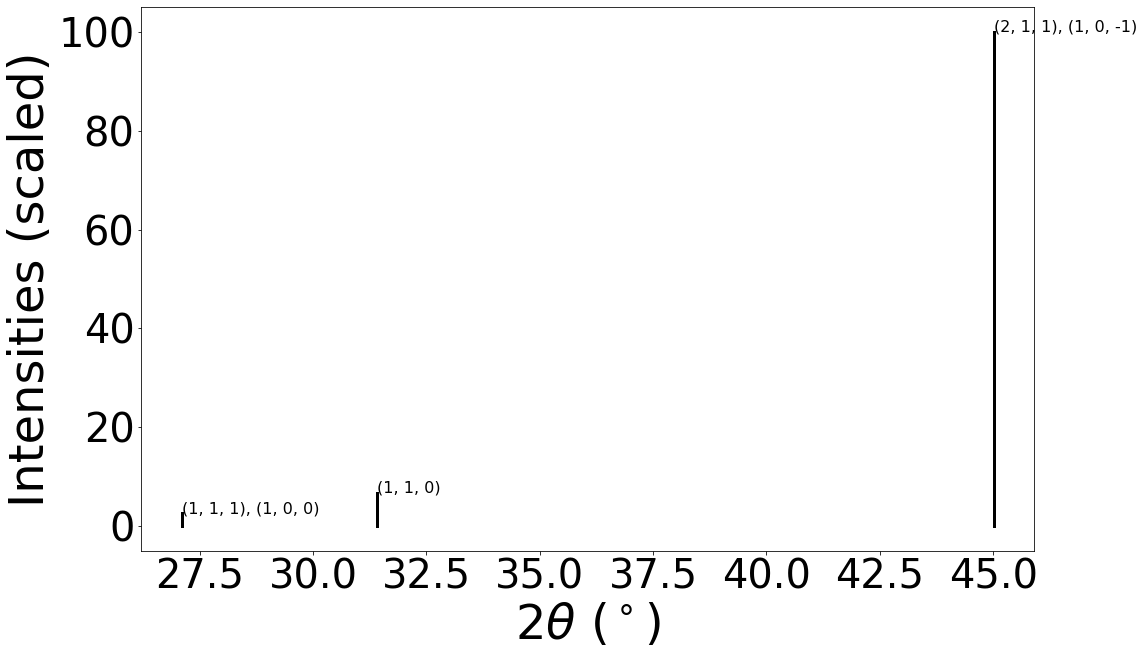

In [45]:
o.show_plot(structure,two_theta_range = (0,50))